Playing with **Excellent Pandas Notebooks from book Pandas Cookbook:** [kaggle discussion](https://www.kaggle.com/discussions/getting-started/120943)

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

# More 'selecting' data

In [4]:
df_complaints = pd.read_csv('../data/311-service-requests.csv', dtype='unicode')
df_complaints.shape

(111069, 52)

## 3.1 Filtering: selecting only noise complaints

In [52]:
df_noise_complaints = df_complaints[df_complaints['Complaint Type'] == 'Noise - Street/Sidewalk']
df_noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63618202176914,-74.1161500428337,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.55342078716953,-74.19674315017886,"(40.55342078716953, -74.19674315017886)"


### Dissecting that filter...

In [53]:
# Filtering by X value
df_complaints['Complaint Type'] == 'Noise - Street/Sidewalk'

0          True
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

In [93]:
# combine conditions with & operator
is_noise = df_complaints['Complaint Type'] == 'Noise - Street/Sidewalk'
in_brooklyn = df_complaints['Borough'] == 'BROOKLYN'
df_complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634103775951736,-73.91105541883589,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6617931276793,-73.95993363978067,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724599563793525,-73.95427134534344,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63616876563881,-73.97245504682485,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6429222774404,-73.97876175474585,"(40.6429222774404, -73.97876175474585)"


In [95]:
# Selecting only a few of columns
df_complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


## 3.2 A digression about numpy arrays

On the inside, the type of a column is `pd.Series`

In [66]:
series = pd.Series([1,2,3])
series

0    1
1    2
2    3
dtype: int64

In [67]:
series.values

array([1, 2, 3])

In [68]:
type(series.values)

numpy.ndarray

In [73]:
# evaluates each element of the array
series.values != 2

array([ True, False,  True])

In [91]:
arr = np.array([1,2,3])
arr[arr != 2]

array([1, 3])

## 3.3 Which borough has the most noise complaints?

In [99]:
df_noise_complaints = df_complaints[is_noise]
df_noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63618202176914,-74.1161500428337,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.55342078716953,-74.19674315017886,"(40.55342078716953, -74.19674315017886)"


In [110]:
# Manhattan is the borough with most noise!
se_noise_counts = df_noise_complaints['Borough'].value_counts()
se_noise_counts

Borough
MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: count, dtype: int64

In [112]:
# Get total number of requests per borough
se_complaints_counts = df_complaints['Borough'].value_counts()
se_complaints_counts

Borough
BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: count, dtype: int64

In [119]:
# Let's get percentage of noise over the total number of requests
se_noise_percentage = se_noise_counts / se_complaints_counts
se_noise_percentage

Borough
BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: count, dtype: float64

<Axes: ylabel='count'>

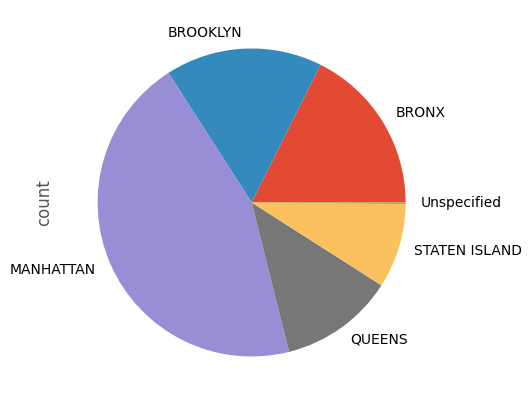

In [131]:
se_noise_percentage.plot(kind='pie')